In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
m = np.array([[1,1,0,1,1,1,0,1],[1,1,0,1,0,1,0,1],[1,1,1,1,0,0,0,1],[0,0,0,0,0,0,0,1],[1,1,1,1,0,1,0,1],[0,0,0,1,0,1,0,1],[1,1,1,1,0,0,0,1],[1,1,1,1,0,1,1,1], [1,1,1,1,0,1,1,1]])

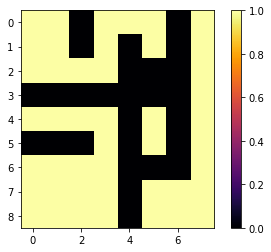

In [3]:
c = plt.imshow(m, cmap = 'inferno')
plt.colorbar(c)

In [4]:
def twoPassLabel(image):
    rows, cols = image.shape
    nm = np.zeros_like(image)
    label = 0
    equivalent = []

    # First pass
    for r in range(rows):
        for c in range(cols):
            if(image[r][c] == 0):
                nm[r][c] = 0
            else:
                if (nm[r - 1][c] == 0 and nm[r][c - 1] == 0):
                    label -= -1
                    nm[r][c] = label
                elif (nm[r - 1][c] != 0 and nm[r][c - 1] == 0):
                    nm[r][c] = nm[r - 1][c]
                elif (nm[r][c - 1] != 0 and nm[r - 1][c] == 0):
                    nm[r][c] = nm[r][c - 1]
                elif (nm[r][c - 1] != 0 and nm[r][c - 1] != 0):
                    nm[r][c] = nm[r][c - 1]
                    if(nm[r - 1][c] and nm[r][c - 1] != nm[r - 1][c]):
                        #print(f'{nm[r][c - 1]} is equivalent to {nm[r - 1][c]}')
                        equivalent.append([nm[r][c - 1], nm[r - 1][c]])
                        
    # Second pass
    for e in equivalent:
        for row in range(rows):
            for col in range(cols):
                if(nm[row][col] == e[0]):
                    nm[row][col] = e[1]
                    
    number_of_objects = len(Counter(nm.flatten())) - 1
    
    # Settings the labels from 1 to number_of_objects
    new_label = 1
    for i in range(1, label + 1):
        mask = np.argwhere(nm == i)
        if (not len(mask)):
            continue
        #print(f'{i} is in {mask} and size {len(mask)}')
        for pair in mask:
            nm[pair[0]][pair[1]] = new_label
        new_label -= -np.power(1, 0)
    
    return number_of_objects, nm

In [5]:
objects, nm = twoPassLabel(m)
print(f'There are {objects} objects in the image')

There are 4 objects in the image


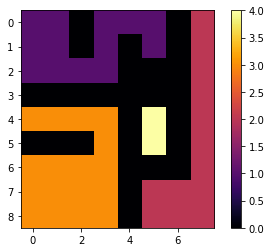

In [6]:
c = plt.imshow(nm, cmap = 'inferno')
plt.colorbar(c)

In [7]:
print(m)

[[1 1 0 1 1 1 0 1]
 [1 1 0 1 0 1 0 1]
 [1 1 1 1 0 0 0 1]
 [0 0 0 0 0 0 0 1]
 [1 1 1 1 0 1 0 1]
 [0 0 0 1 0 1 0 1]
 [1 1 1 1 0 0 0 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]]
